# Detecting Pneumonia from X-Ray Images Using a Convolutional Neural Network

###### Authors:
[Rachel Edwards](mailto:rachelke411@gmail.com),
[Svitlana Glibova](mailto:s.glibova@gmail.com),
[Jamie Dowat](mailto:jamie_dowat44@yahoo.com)

![patient](img/childhospital.jpg)


## Business Understanding

#### According to the [American Thoracic Society](https://www.thoracic.org/patients/patient-resources/resources/top-pneumonia-facts.pdf) and the [American Lung Association](https://www.lung.org/lung-health-diseases/lung-disease-lookup/lung-cancer/resource-library/lung-cancer-fact-sheet?referrer=https://www.google.com/):

> Pneumonia is the world’s leading cause of death among **children under 5** years of age.
********
> Pneumonia killed approximately **2,400 children a day** in 2015. 
********
> Pneumonia killed an estimated **880,000 children under the age of five** in 2016.
********
> More than **150,000 people** are estimated to die from **lung cancer** each year. 
********
> Infections, including pneumonia, are the **second most common cause of death in people with lung cancer**.
********


#### From a recent study by the Association of American Medical Colleges ([AAMC](https://www.aamc.org/news-insights/us-physician-shortage-growing)):

> “The **physician workforce shortages** that our nation is facing are being felt even more acutely as we mobilize on the front lines to combat the COVID-19 national emergency.” --David J. Skorton, MD, *AAMC president and CEO*
********
> The demographic that is going to suffer most from this shortage is **patients over age 65**: "While the national population is projected to grow by 10.4% during the 15 years covered by the study, *the over-65 population is expected to grow by 45.1%*."

********

#### Pneumonia: A Quick Review

[Pneumonia](https://www.mayoclinic.org/diseases-conditions/pneumonia/symptoms-causes/syc-20354204) is an inflammation of the air sacs of the lungs. Various bacteria, viruses, and fungi can cause this disease. The inflammation causes the lungs to be filled with infiltrates (pus/fluids) which reduces the lungs' ability to get oxygen to the body. Pneumonia can lead to bacteremia (can cause septic shock and organ failure), trouble breathing, fluid buildup, and lung abscess. 

**Formal Diagnosis** is done with a [chest x-ray](https://www.glowm.com/atlas-page/atlasid/chestXray.html#Pneumonia) (to check for inflammation) and a blood test (to check for presence of infection).

For bacterial cases, **treatment** mostly revolves around an antibiotic, while viral cases utilize supportive treatement (such as providing extra oxygen and fluids) with an antiviral drug-- however, the [American Thoracic Society](https://www.thoracic.org/patients/patient-resources/resources/top-pneumonia-facts.pdf) notes that **"There are few or no treatments for most viral causes of pneumonia".**


For more reading on the illness, click [here](https://www.healthline.com/health/pneumonia-with-lung-cancer#causes) or [here](https://www.lung.org/lung-health-diseases/lung-disease-lookup/pneumonia/what-causes-pneumonia).
*******
### In a nutshell...

1. This disease has a significant death rate.
2. There are a shortage of healthcare professionals, with a growing demand for them, especially for age groups vulnerable to this disease.
3. ***Delays in diagnosis can be a contributor to the fatality rate.*** (Sources: [1](https://erj.ersjournals.com/content/32/1/12), [2](https://www.healthline.com/health/pneumonia-with-lung-cancer#causes))
*******
### Implications of Automated Diagnostic Systems:
###### Mirroring the 2018 Study/Development of Convolutional Neural Networks 

*Funded by National Key Research and Development Program of China, National Natural Science Foundation of China, Guangzhou Women and Children’s Medical Center , Guangzhou Regenerative Medicine and Health Guangdong Laboratory, the Richard Annesser Fund , the Michael Martin Fund , and the Dick and Carol Hertzberg Fund.*

For the full pdf of the study, click [here](https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5#secsectitle0010)!

Though their study was mainly focused on identifying macular degeneration, the same neural network modeling was performed on a set of chest-xrays to distinguish between viral, bacterial, and normal x-ray scans.

After developing a highly accurate Convolutional Neural Network, they predict that their diagnostic tool **"may ultimately aid in expediting the diagnosis and referral of these treatable conditions, thereby facilitating earlier treatment, resulting in improved clinical outcomes."**

In agreement with the stastical overview above, a highly accurate classification tool-- a consolidation of the knowledge of medical experts-- could prove to increase the capability of treatment centers to diagnose more efficiently, and even more *accurately.*


## Analysis Sneak Peek



...tbd

## Exploratory Data Analysis

### About the Dataset

![datasource](img/medcenter.jpg)

For the **original dataset**, click [here](https://data.mendeley.com/datasets/rscbjbr9sj/2).

For the *sorted* dataset **needed to run this notebook**, click [here]().

* **CONTENT**: 5856 images from pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

* **PROCESS**: “For the analysis of chest X-ray images, all chest radiographs were initially *screened for quality control by removing all low quality or unreadable scans.* The diagnoses for the images were then graded by *two expert physicians* before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.” ([page 12](https://www.cell.com/action/showPdf?pii=S0092-8674%2818%2930154-5))

#### *Let's dive in!*

To check out the behind the scenes behind all of this network building, check out the `src` directory.

In [1]:
from src.build_nn import NeuralNet

In [2]:
cnn = NeuralNet()

In [3]:
cnn.preprocess()

Image paths loaded from folder(s)...
Converted images into PIL.Image.Image and array formats...
Stored dataframe of data in .df_ attribute...
Found 624 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.
Found 624 images belonging to 3 classes.
Found 5232 images belonging to 3 classes.
Data is ready for modeling.

You can check out the preprocessed data with the following attributes: 

.binary_test_images
.binary_train_images
.binary_train_labels
.ternary_train_images
.ternary_test_images
.ternary_train_labels
etc.


In [4]:
cnn.binary_train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [5]:
cnn.ternary_train_gen.class_indices

{'BACTERIAL': 0, 'NORMAL': 1, 'VIRAL': 2}

In [7]:
cnn.df_.head()

,image,label,train,test,gs_sum
0,<PIL.Image.Image image mode=L size=224x224 at ...,bacterial,1,0,6019692
1,<PIL.Image.Image image mode=L size=224x224 at ...,bacterial,1,0,5639308
2,<PIL.Image.Image image mode=L size=224x224 at ...,bacterial,1,0,7446664
3,<PIL.Image.Image image mode=L size=224x224 at ...,bacterial,1,0,6441408
4,<PIL.Image.Image image mode=L size=224x224 at ...,bacterial,1,0,4795305


In [5]:
cnn.df_[['train', 'test', 'label']].groupby('label').sum()

,train,test
label,,
bacterial,2538,242
normal,1349,234
viral,1345,148


Let's take a look at it in graph form:

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

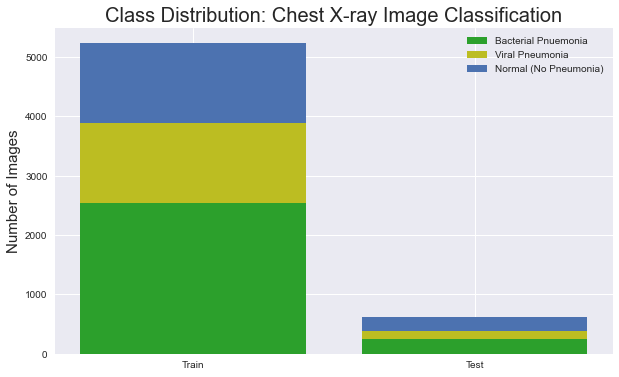

In [6]:
cnn.show_class_distribution()

For a closer look at these images, we examined it's primary feature: **grayscale** values. When converted into an array, each pixel in the image (224x224) is assigned a value between **0 and 255**.

<img src="img/grayscale.png" width="600" height="100" />

From a chest-xray, pneumonia-induced inflammation can be tracked with the presence of excess "infiltrates" in the lungs. Take a look at this labeled diagram of a typical xray:

<img src="img/chest_xray_labeled.jpg" width="400" height="400" />



From our elementary understanding of the primary pneumonia signifiers in these scans, we decided to see if there was a marked different betweeen the average "whiteness" of normal lung scans versus infected.

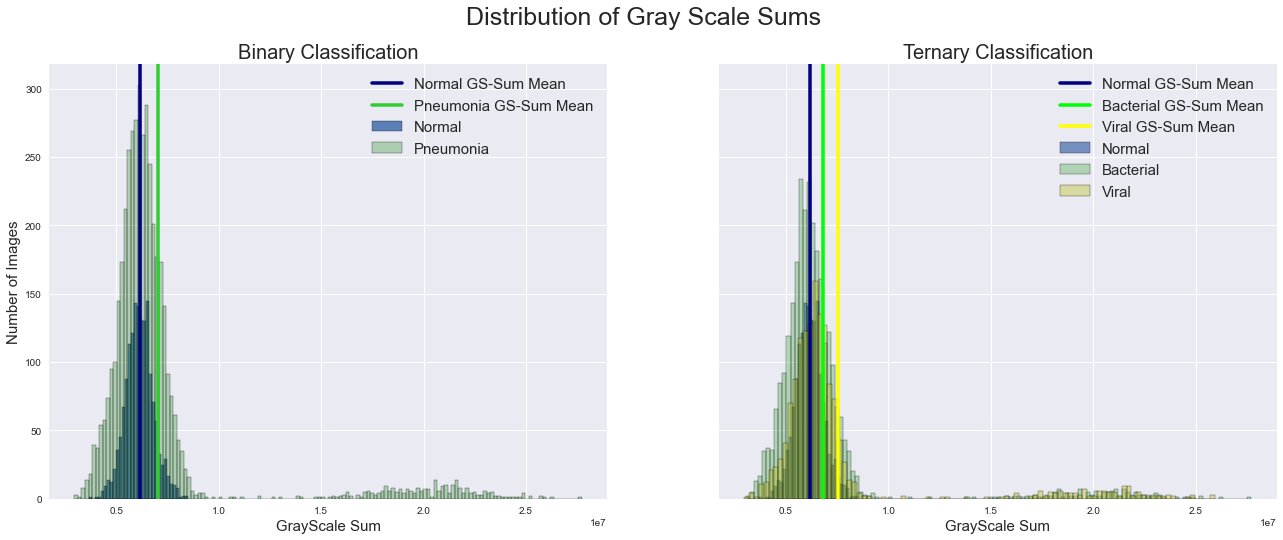

In [7]:
cnn.grayscale_sum_dist()

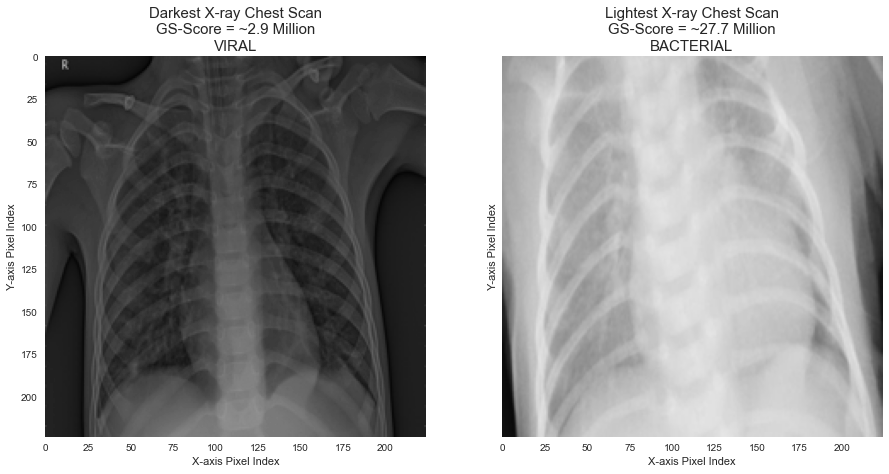

In [8]:
cnn.dark_vs_light(1)

To become more familiar with the images, we sought to explore how different images looked for each class label (bacterial, viral, normal):

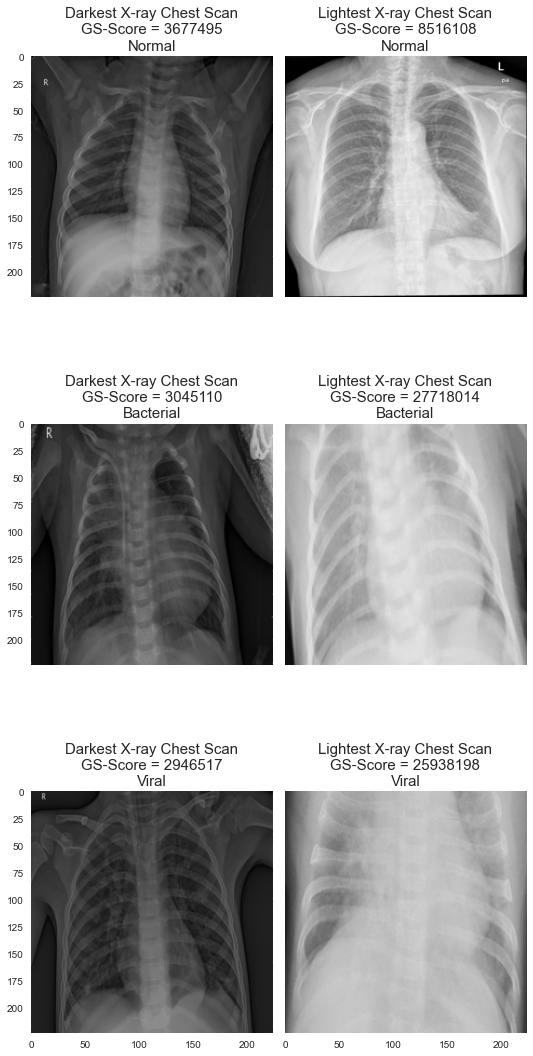

In [9]:
cnn.dark_vs_light(2)

##### Main Takeaways:
* These images, in their original form, did not come in the same dimensions.
* Images of the same class have a very wide range of overall darkness/lightness, with variations in **contrast, angle, zoom, and body type**.

*********
## Network Time!

#### Parameters of consideration:
* Learning Rate
* Activation Function
* Number of Layers
    * Layer type
    * Filter size
* Batch Normalization
* Batch Size
* Epoch Size
* 

In [8]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import metrics

### Our FSM!

In [9]:
fsm_layers = [Conv2D(32, (3, 3), activation='relu',input_shape=(224 , 224, 3)),
            MaxPooling2D((2, 2)), 
            Conv2D(32, (4, 4), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(1, activation='sigmoid')]

In [10]:
cnn.build_model(layers=fsm_layers,
                model_name = 'FSM',
                ternary=False,
                optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=(['accuracy'], metrics.Recall()),
                epochs=10,
                batch_size=64,
                validation_split=.2,
                save=True, 
                save_path='data/saved_models/fsm/'
                )

Epoch 1/10
66/66 [==============================] - 243s 4s/step - loss: 1.4236 - accuracy: 0.6602 - recall: 0.7815 - val_loss: 0.5771 - val_accuracy: 0.7259 - val_recall: 1.0000
Epoch 2/10
66/66 [==============================] - 234s 4s/step - loss: 0.5046 - accuracy: 0.7673 - recall: 0.9486 - val_loss: 0.4764 - val_accuracy: 0.8214 - val_recall: 0.9605
Epoch 3/10
66/66 [==============================] - 240s 4s/step - loss: 0.4178 - accuracy: 0.8285 - recall: 0.9442 - val_loss: 0.3807 - val_accuracy: 0.8472 - val_recall: 0.9539
Epoch 4/10
66/66 [==============================] - 236s 4s/step - loss: 0.3586 - accuracy: 0.8548 - recall: 0.9267 - val_loss: 0.2951 - val_accuracy: 0.8701 - val_recall: 0.9276
Epoch 5/10
66/66 [==============================] - 240s 4s/step - loss: 0.3155 - accuracy: 0.8544 - recall: 0.9109 - val_loss: 0.3731 - val_accuracy: 0.8300 - val_recall: 0.9842
Epoch 6/10
66/66 [==============================] - 234s 4s/step - loss: 0.2595 - accuracy: 0.8939 - reca

### FSM Diagnostics

In [11]:
test_images = cnn.binary_test_images
test_labels = cnn.binary_test_labels

In [12]:
y_true = test_labels

In [13]:
y_pred = cnn.model.predict(test_images)

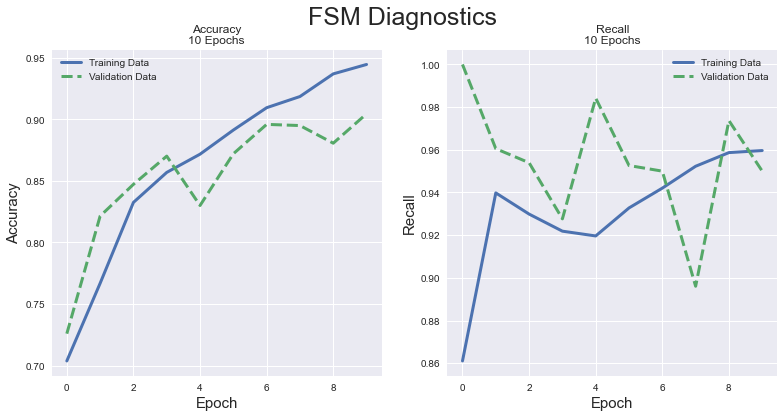

In [14]:
cnn.get_results(graph_name='acc_recall')

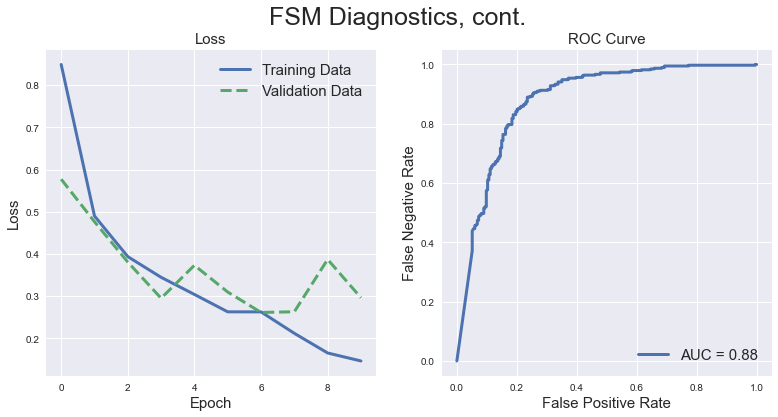

In [15]:
cnn.get_results(graph_name='loss_roc', y_pred=y_pred, y_true=y_true)

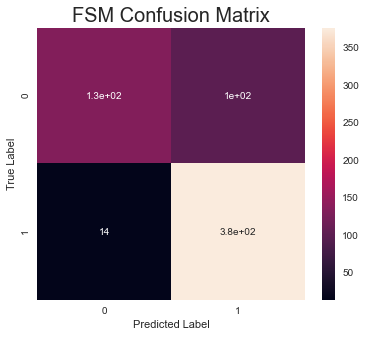

In [16]:
cnn.get_results(graph_name='confusion_matrix', y_pred=y_pred, y_true=y_true)

In [24]:
cnn.model.layers

In [ ]:
np.argmax(model.predict(x), axis=-1)

### Model #2

In [ ]:
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
mod2_layers = [Conv2D(32, (5, 5), activation='relu', input_shape=(224 , 224, 1)),
            MaxPooling2D((2, 2)), 
            Conv2D(32, (4, 4), activation='relu'),
            MaxPooling2D((2, 2), padding = 'same'),
            LeakyReLU(),
            MaxPooling2D((2, 2), padding = 'same'),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(1, activation='sigmoid')]

In [ ]:
cnn.build_model(layers=mod2_layers,
                model_name = "Model 2"
                ternary=False,
                optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=(['accuracy'], metrics.Recall()),
                epochs=10,
                batch_size=64,
                validation_split=.2,
                save=True, 
                save_path='data/saved_models/', 
                save_freq='epoch'
                )

### Model #2 Diagnostics

In [ ]:
# Create a new list of predictions with the new model
y_pred = cnn.model.predict(test_images)

Text(0.5, 0.98, 'FSM Diagnostics')

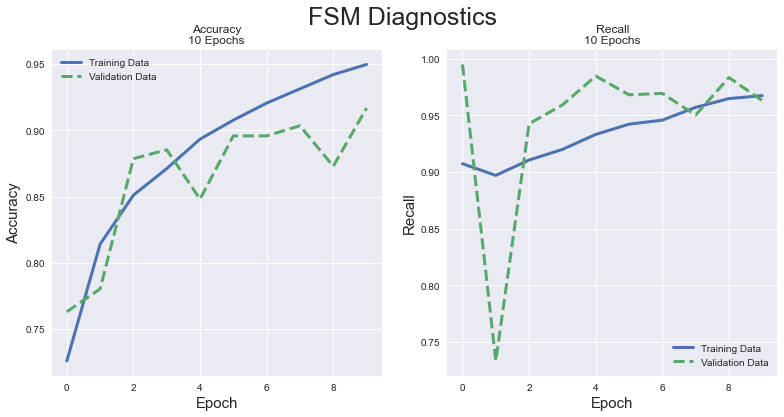

In [27]:
cnn.get_results(graph_name='acc_recall')

Text(0.5, 0.98, 'FSM Diagnostics')

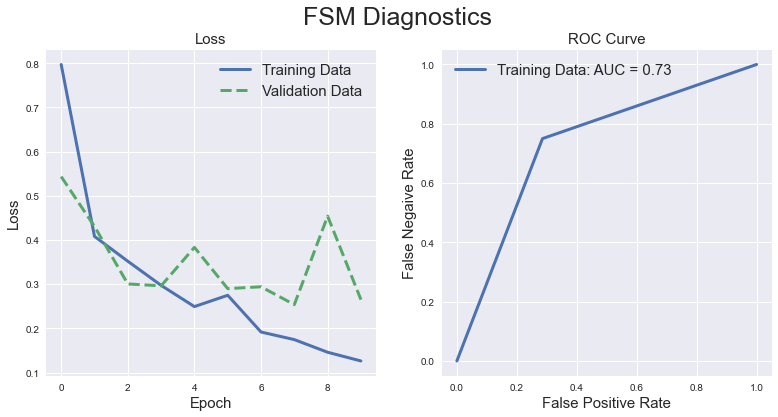

In [45]:
cnn.get_results(graph_name='loss_roc')

In [ ]:
cnn.get_results(graph_name='confusion_matrix')

### FINAL MODEL

In [ ]:
final_layers = [Conv2D(32, (3, 3), activation='relu',input_shape=(224 , 224, 1)),
            MaxPooling2D((2, 2)), 
            Conv2D(32, (4, 4), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(1, activation='sigmoid')]

In [ ]:
cnn.build_model(layers=final_layers,
                ternary=False,
                optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=(['accuracy'], metrics.Recall()),
                epochs=10,
                batch_size=64,
                validation_split=.2
                )

### FINAL MODEL Diagnostics

### MetaAnalysis

## Conclusions & Next Steps

* Try a different type of neural network???
    * VGG16
    * Image Net
    * Res Net
    * Inception
    * YOLO V3
    ...


## Sources/Acknowledgements

#### Original study and dataset:
* [data.mendeley.com](https://data.mendeley.com/datasets/rscbjbr9sj/2)
* [Full pdf of study](https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5#secsectitle0010)

#### Source Code:
* [Lime](https://github.com/marcotcr/lime) (Local Interpretable Model-agnostic Explanations)
* Getting weights for each epoch - [datascience.stackexchange.com](https://datascience.stackexchange.com/questions/85409/getting-nn-weights-for-every-batch-epoch-from-keras-model/85446#85446?newreg=5bd6441b5aab414292065180dfc4c39d)
* [TensorBoard Tutorial](https://towardsdatascience.com/visualizing-your-model-using-tensorboard-796ebb73e98d) by YuFeng G
* [How to print predictions with class labels](https://github.com/tensorflow/datasets/issues/2500)